In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
# Define a year as a "Superman year"
# whose films feature more Superman characters than Batman.
# How many years in film history have been Superman years?

c = cast
c = c[(c['character'] == 'Superman') | (c['character'] == 'Batman')]
c = c.groupby(['year', 'character']).size()

c = c.unstack()
c = c.fillna(0)
c.head()

d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
11


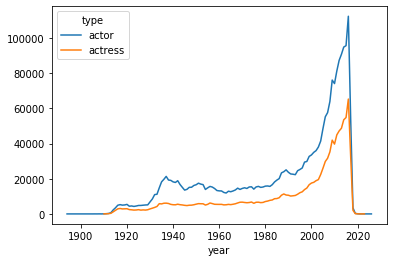

In [6]:
# Plot the number of actor roles each year
# and the number of actress roles each year
# over the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

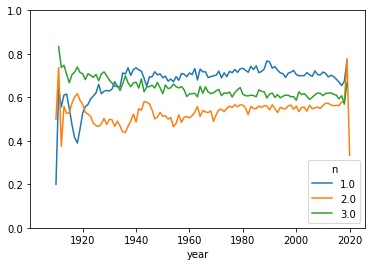

In [7]:
# Build a plot with a line for each rank n=1 through n=3,
# where the line shows what fraction of that rank's roles
# were 'actor' roles for each year in the history of film.

c = cast
c = c[c['n'] <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c['actor'] / (c['actor'] + c['actress'])
r = r.unstack('n')
r.plot(ylim=[0,1])